In [0]:
import pandas as pd

%matplotlib inline

# Sección nueva

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv("/content/drive/My Drive/FES Acatlán/Diplomado en Ciencia de Datos/Generación 1/Módulo 1/Datos/defunciones_generales_2015.csv")

In [0]:
edad = pd.read_csv("/content/drive/My Drive/FES Acatlán/Diplomado en Ciencia de Datos/Generación 1/Módulo 1/Datos/catalogos15/deedad.csv")

In [0]:
df = df.merge(edad, how="left", left_on="edad", right_on="CVE")

In [0]:
df = df[df["edad"].astype(str).str.startswith("4")]

In [0]:
df = df[df["edad"] != 4998].reset_index(drop = False).copy()

In [0]:
df["v_edad"] = df["edad"].astype(str).str[-3:].astype(int)

In [41]:
df["v_edad"].describe()

count    626642.000000
mean         66.033984
std          20.737481
min           1.000000
25%          54.000000
50%          70.000000
75%          82.000000
max         120.000000
Name: v_edad, dtype: float64

In [0]:
df["anios"] = df["edad"].apply(lambda x: 0 if str(x).startswith("1") else int(str(x)[-3:]))

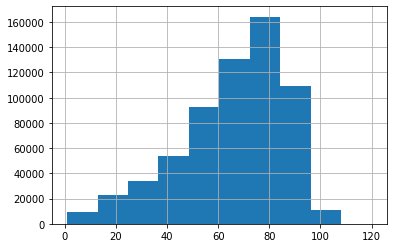

In [42]:
df["v_edad"].hist();

In [0]:
genero = pd.read_csv("/content/drive/My Drive/FES Acatlán/Diplomado en Ciencia de Datos/Generación 1/Módulo 1/Datos/catalogos15/desexo.csv")

In [45]:
genero

,CVE,DESCRIP
0,1,Hombres
1,2,Mujeres
2,9,Sexo no especificado


In [0]:
esco = pd.read_csv("/content/drive/My Drive/FES Acatlán/Diplomado en Ciencia de Datos/Generación 1/Módulo 1/Datos/catalogos15/deesco.csv")

In [51]:
esco

,CVE,DESCRIP
0,1,Sin escolaridad
1,2,Preescolar
2,3,Primaria incompleta
3,4,Primaria completa
4,5,Secundaria incompleta
5,6,Secundaria completa
6,7,Bachillerato o Preparatoria incompleto
7,8,Bachillerato o Preparatoria completo
8,9,Profesional
9,10,Posgrado


In [57]:
df[["v_edad", "escolarida", "sexo", "mes_ocurr"]].groupby(["escolarida", "sexo", "mes_ocurr"]).agg(["mean", "min", "max", "count"])

v_edad               
                                mean min  max count
escolarida sexo mes_ocurr                          
1          1    1          74.646133   3  114  5844
                2          74.427862   3  115  4831
                3          74.255522   3  114  5025
                4          73.711333   3  111  4209
                5          73.758860   3  113  4458
...                              ...  ..  ...   ...
99         9    8          32.500000  25   40     2
                9          40.000000  40   40     1
                10         30.000000  30   30     1
                11         66.500000  53   80     2
                12         55.000000  55   55     1

[323 rows x 4 columns]

In [0]:
df[["sitio_ocur", "sexo", "anios", "ent_regis", "escolarida", "mes_ocurr"]].groupby(["sitio_ocur", "sexo", "ent_regis", "escolarida", "mes_ocurr"]).agg(["mean", "min", "max", "count"])

anios              
                                                     mean min max count
sitio_ocur sexo ent_regis escolarida mes_ocurr                         
1          1    1         1          1          76.000000  73  79     4
                                     2          80.333333  71  86     3
                                     3          83.600000  74  88     5
                                     4          84.500000  79  87     4
                                     5          55.875000  33  76     8
                                     6          70.500000  55  86     2
                                     7          65.000000  65  65     1
                                     8          98.000000  98  98     1
                                     9          81.000000  81  81     1
                                     10         72.500000  70  75     2
                                     11         76.250000  64  88     4
                                     12         60.666667  29  84     3
                          2          4           5.000000   5   5     1
                                     6           4.000000   4   4     1
                          3          1          77.100000  42  97    10
                                     2          73.900000  36  93    10
                                     3          59.666667  10  88     9
                                     4          56.933333  18  96    15
                                     5          71.785714  48  90    14
                                     6          56.833333  33  73     6
                                     7          57.250000   9  84    12
                                     8          50.909091   7  81    11
                                     9          67.777778  10  92     9
                                     10         72.600000  19  93    10
                                     11         66.545455  35  88    11
                                     12         59.111111  26  96     9
                          4          1          62.900000  24  81    10
                                     2          50.500000  25  89     8
                                     3          37.000000  12  60     3
                                     4          68.857143  43  92     7
...                                                   ...  ..  ..   ...
99         2    31        6          7          21.000000  21  21     1
                          88         1           2.000000   2   2     1
                                     9           2.000000   2   2     1
                          99         1          95.000000  95  95     1
                                     2          85.000000  80  90     2
                                     4          75.333333  61  88     3
                                     8          69.000000  69  69     1
                                     12         88.000000  88  88     1
                32        3          1          75.500000  70  81     2
                                     3          69.000000  69  69     1
                          4          1          79.000000  79  79     1
                          6          1          24.000000  24  24     1
                          7          11         26.000000  26  26     1
                          99         1          76.000000  76  76     1
                                     4          84.500000  78  91     2
                                     5          80.000000  80  80     1
                                     6          77.000000  77  77     1
                                     7          62.000000  62  62     1
                                     8          77.666667  67  88     3
           9    14        88         2           5.000000   5   5     1
                                     4          10.000000  10  10     1
                                     6           2.000000   2   2     1
                15  

In [0]:
df[["ocupacion", "anios"]].groupby(["ocupacion"]).agg(["mean", "count"])

anios        
                mean   count
ocupacion                   
1          57.916519    2264
2          59.263221   27380
3          55.553851    3454
4          61.619452   32603
5          55.667478    9449
6          71.298719   74525
7          58.794848   39444
8          54.112551   14349
9          59.758074   18609
10         56.111628     215
11         70.623169  347814
97          4.635998   31085
98         48.428193   26815
99         60.487426   24693

In [0]:
aux = df[["ent_resid", "mun_resid", "anios"]].groupby(["mun_resid", "ent_resid"]).agg(["mean", "count"]).reset_index()

In [0]:
df["anios"].mean()

63.60339605239169

In [0]:
aux[(aux["ent_resid"] == 13)  & (aux["mun_resid"] == 77)]

mun_resid ent_resid      anios      
                               mean count
1468        77        13  62.869281   765

In [0]:
df

,index,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,...,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax,anios
0,0,1,1,1,1,15,1,1,1,15,...,NaN,2,2,88,88,888,8888,0,999,69
1,1,1,1,1,1,15,1,1,1,15,...,NaN,9,1,88,88,888,8888,0,999,93
2,2,1,1,1,1,15,1,1,1,15,...,NaN,9,1,88,88,888,8888,0,999,92
3,3,1,1,1,1,15,1,1,1,15,...,NaN,2,1,88,88,888,8888,0,999,47
4,4,1,1,1,1,15,1,1,1,15,...,NaN,2,2,88,88,888,8888,0,999,40
5,5,1,1,1,1,15,1,1,1,15,...,NaN,9,2,88,88,888,8888,0,999,89
6,6,1,1,1,1,15,1,1,1,15,...,NaN,2,2,88,88,888,8888,0,999,66
7,7,1,1,1,1,15,1,1,1,15,...,NaN,9,2,88,88,888,8888,0,999,67
8,8,1,1,1,1,15,1,1,1,15,...,NaN,9,1,88,88,888,8888,0,999,44
9,9,1,1,1,10,1,74,1,1,15,...,NaN,2,1,88,99,999,9999,0,999,21


In [0]:
df.columns

Index(['ent_regis', 'mun_regis', 'ent_resid', 'mun_resid', 'tloc_resid',
       'loc_resid', 'ent_ocurr', 'mun_ocurr', 'tloc_ocurr', 'loc_ocurr',
       'causa_def', 'lista_mex', 'sexo', 'edad', 'dia_ocurr', 'mes_ocurr',
       'anio_ocur', 'dia_regis', 'mes_regis', 'anio_regis', 'dia_nacim',
       'mes_nacim', 'anio_nacim', 'ocupacion', 'escolarida', 'edo_civil',
       'presunto', 'ocurr_trab', 'lugar_ocur', 'necropsia', 'asist_medi',
       'sitio_ocur', 'cond_cert', 'nacionalid', 'derechohab', 'embarazo',
       'rel_emba', 'horas', 'minutos', 'capitulo', 'grupo', 'lista1',
       'gr_lismex', 'vio_fami', 'area_ur', 'edad_agru', 'complicaro',
       'dia_cert', 'mes_cert', 'anio_cert', 'maternas', 'lengua', 'cond_act',
       'par_agre', 'ent_ocules', 'mun_ocules', 'loc_ocules', 'razon_m',
       'dis_re_oax'],
      dtype='object')

In [0]:
df.shape

(655688, 59)